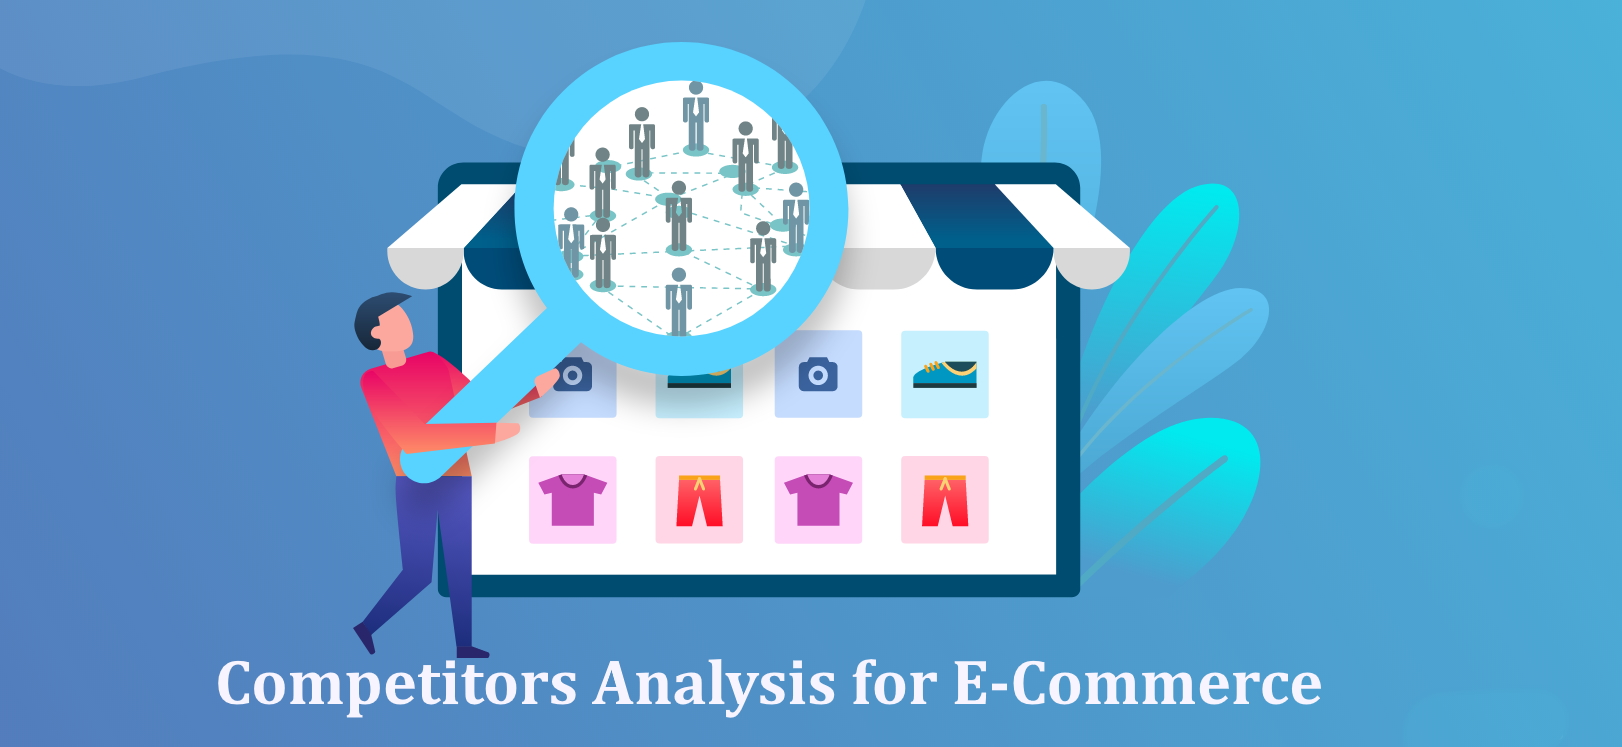

Image source: https://cdn.wedevs.com/uploads/2020/07/Ultimate-guide-to-Competitor-Analysis.png

ISS PLP Project <br>
Project Members:

*   ONN WEI CHENG A0092201X
*   YANG JIESHEN A0003901Y
*   DANIEL TAN HOONG XIANG A0074608B
*   CHENG KOK CHENG A0038791W
*   YEE ZHI QUAN DARREL A021571M

In [ ]:
# Reset Git directory in Google Colab
%cd /content
!rm -rf ISS_PLP_Project
!git clone https://github.com/CaseyCheng1988/ISS_PLP_Project
%cd /content/ISS_PLP_Project

/content
Cloning into 'ISS_PLP_Project'...
remote: Enumerating objects: 663, done.
remote: Counting objects: 100% (663/663), done.
remote: Compressing objects: 100% (554/554), done.
remote: Total 663 (delta 275), reused 346 (delta 88), pack-reused 0
Receiving objects: 100% (663/663), 167.20 MiB | 26.43 MiB/s, done.
Resolving deltas: 100% (275/275), done.
Checking out files: 100% (217/217), done.
/content/ISS_PLP_Project


# **1. NER and Word Cloud for Competitor Product Titles Indentification**
Example: <br>


> Mens Denim Jeans Regular Fit (3 Colours)<br>
> https://shopee.sg/Mens-Denim-Jeans-Regular-Fit-(3-Colours)-i.20660177.5646321332?sp_atk=501e60df-37ec-4ff5-9341-fbb132922667<br>
> ShopID: 20660177<br>
> ItemID: 5646321332

In [ ]:
# Initialize search engine and NER model
# Input base product and search for product name
import os
from CompetitorClass import CompetitorSpace

NER_MODEL = os.path.join('TitleNER', 'title_model')

base_product_ID = input('Input Base Product ID: ')
base_product_shopID = input('Input Base Product Shop ID: ')
search_engine = CompetitorSpace(ner_model=NER_MODEL)

try:
  base_product_title = search_engine.get_item_name(base_product_ID, base_product_shopID)
  print(f'Found product title: {base_product_title}')
except:
  print('Unable to find product')


Input Base Product ID: 5646321332
Input Base Product Shop ID: 20660177
Found product title: Mens Denim Jeans Regular Fit (3 Colours)


In [ ]:
# Search for competitors' products based on NER combination of product base title
competitors = search_engine.get_competitors(base_product_title, prod_limit=10)
temp = []
for products in competitors:
  products = {k: v for k, v in ([('base_product_shopid', base_product_shopID)] + list(products.items()))}
  products = {k: v for k, v in ([('base_product_id', base_product_ID)] + list(products.items()))}
  products = {k: v for k, v in ([('base_product_title', base_product_title)] + list(products.items()))}
  temp.append(products)
competitors = temp

for products in competitors:
  print(products)

Detected named entities:  {'BRAND': ['Mens'], 'MODEL': ['Denim'], 'TYPE': ['Jeans', 'Regular Fit'], 'VAR_SIZE': [], 'VAR_COLOUR': [], 'VAR_QTY': [], 'DEMOGRAPHIC': []}
Searching products similar to:  Jeans_Regular_Fit  ......
{'base_product_title': 'Mens Denim Jeans Regular Fit (3 Colours)', 'base_product_id': '5646321332', 'base_product_shopid': '20660177', 'itemid': 6663371016, 'shopid': 335582815, 'title': "Regular fit 505 Men's jeans / original Quality Standard Men's jeans"}
{'base_product_title': 'Mens Denim Jeans Regular Fit (3 Colours)', 'base_product_id': '5646321332', 'base_product_shopid': '20660177', 'itemid': 5646321332, 'shopid': 20660177, 'title': 'Mens Denim Jeans Regular Fit (3 Colours)'}
{'base_product_title': 'Mens Denim Jeans Regular Fit (3 Colours)', 'base_product_id': '5646321332', 'base_product_shopid': '20660177', 'itemid': 4257282522, 'shopid': 219866815, 'title': '[Shop Malaysia] Seluar Levs 501 Regular Fit Straight Cut Men Jeans'}
{'base_product_title': 'Mens 

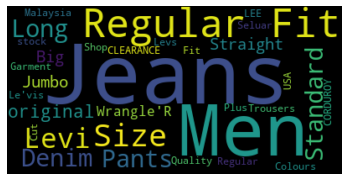

In [ ]:
# Presenting of Word Cloud to display top words from competitors' titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt
competitor_title_ls = [products['title'] for products in competitors]

def list2wordcloud(review_list):
    merged_text = ' '.join(review_list)

    wordcloud = WordCloud().generate(merged_text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Returns an image array
    return wordcloud.to_array()

img = list2wordcloud(competitor_title_ls)

In [ ]:
# Extract reviews for base product
base_product_review = search_engine.get_review_text(base_product_ID, base_product_shopID)
print('Peeking into first 5 reviews:')
for reviews in base_product_review[:5]: print(reviews)
print(f'Number of reviews found: {len(base_product_review)}')

Peeking into first 5 reviews:
Well received, delivery took some time but overall happy with the purchase. Nice jeans and material looks good.
Item arrived as described. Thanks for the fast delivery
Fast delivery, good sellers, can recommend to all look for lower price pants and quality good (especially for work)
Received in good conditions. Correct size.. Will buy again. Fast deliver.
Item received as described, fit just right.
Item delivered quicker than expected
Number of reviews found: 68


In [ ]:
# Extract reviews for competitors' products
competitor_reviews = []
for product in competitors:
  try:
    reviews = search_engine.get_review_text(product['itemid'], product['shopid'])
  except:
    continue
  for review in reviews:
    competitor_reviews.append(review)
print('Peeking into first 5 reviews:')
for reviews in competitor_reviews[:5]: print(reviews)
print(f'Number of competitor reviews found: {len(competitor_reviews)}')

Peeking into first 5 reviews:
Just received today with good condition, Good material I hope my husband likes it.
the quality are good. would say it is just a typical good quality jeans👖
First time buying and definitely will buy again.
very fast delivery and  quality OK
Thanks you seller friendly seller.
Second order from the seller. The material is nice and comfortable. Cutting is a bit small, better to order 1 or 2 size bigger.👌
Number of competitor reviews found: 125


# **2. Aspect Based Sentiment Analysis between Base and Competitors Products**

Show case 2 methods for ABSA to analyze product aspect sentiments
1.   NER based approach (AB) + supervised CNN (SA) 
2.   Rule based approach (AB) + supervised CNN (SA)




In [ ]:
# Helper functions to count sentiments for each aspect
def countSents(reviews):
  aspect_count = {'APPEARANCE': {'POSITIVE': 0, 'None': 0, 'NEGATIVE': 0},
                  'COMFORT':    {'POSITIVE': 0, 'None': 0, 'NEGATIVE': 0},
                  'DELIVERY':   {'POSITIVE': 0, 'None': 0, 'NEGATIVE': 0},
                  'PRICE':      {'POSITIVE': 0, 'None': 0, 'NEGATIVE': 0},
                  'QUALITY':    {'POSITIVE': 0, 'None': 0, 'NEGATIVE': 0},
                  'SIZE':       {'POSITIVE': 0, 'None': 0, 'NEGATIVE': 0}}

  for review in reviews:
    for key in review:
      try:
        aspect_count[key.upper()][review[key].upper()] += 1
      except:
        aspect_count[key.upper()]['None'] += 1
  
  return aspect_count

In [ ]:
# Helper function to plot stacked bar charts for data analysis
import pandas as pd
import matplotlib.pyplot as plt

def displayStackedBar(aspect_count):

  df = pd.DataFrame(aspect_count)
  print(df)
  df.drop('None', inplace=True)
  df.T.plot(kind="bar", stacked=True)
  plt.show()

In [ ]:
%%capture
!python -m spacy download en_core_web_sm

## 2.1 NER + supervised CNN ABSA Model

In [ ]:
# Acquire sentiment and aspects for NER + supervised CNN ABSA Model
from absa_NN.absa_NN import load_ab_model, load_sa_model, get_aspects, aspects2sentiments
import sys
sys.path.append('absa_NN')

ab_model = load_ab_model()
sa_model = load_sa_model()

base_product_sents = []

for review in base_product_review:
  aspects = get_aspects(review, ab_model)
  sents = aspects2sentiments(aspects, sa_model)
  base_product_sents.append(sents)

competitors_sents = []

for review in competitor_reviews:
  aspects = get_aspects(review, ab_model)
  sents = aspects2sentiments(aspects, sa_model)
  competitors_sents.append(sents)

          APPEARANCE  COMFORT  DELIVERY  PRICE  QUALITY  SIZE
POSITIVE           4        9        26      4       17    22
None              63       58        42     64       49    45
NEGATIVE           1        1         0      0        2     1


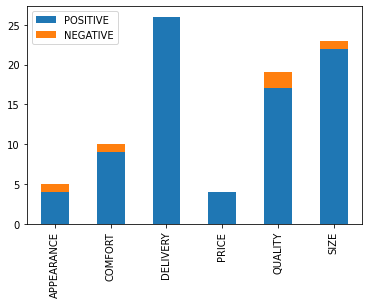

In [ ]:
base_product_sents_compile = countSents(base_product_sents)
displayStackedBar(base_product_sents_compile)

          APPEARANCE  COMFORT  DELIVERY  PRICE  QUALITY  SIZE
POSITIVE           5       15        43      4       36    29
None             117      109        81    120       86    88
NEGATIVE           3        1         1      1        3     8


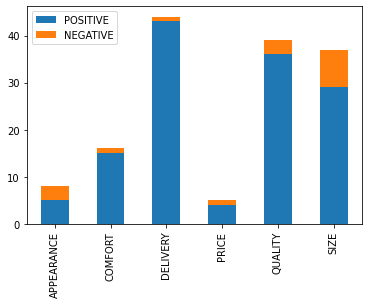

In [ ]:
competitors_sents_compile = countSents(competitors_sents)
displayStackedBar(competitors_sents_compile)

## 2.2 Rule-based + supervised CNN ABSA Model

In [ ]:
%%capture
from SentimentAnalysiswithAspect.rule_based_adsa import Rule_Based_ADSA

rule_based_ADSA = Rule_Based_ADSA()
SENTI_MODEL = 'logreg'

base_product_sents_RB = []

for review in base_product_review:
  sents = rule_based_ADSA.rule_based_ADSA_model(review, SENTI_MODEL = SENTI_MODEL)
  base_product_sents_RB.append(sents)

competitors_sents_RB = []

for review in competitor_reviews:
  sents = rule_based_ADSA.rule_based_ADSA_model(review, SENTI_MODEL = SENTI_MODEL)
  competitors_sents_RB.append(sents)

          APPEARANCE  COMFORT  DELIVERY  PRICE  QUALITY  SIZE
POSITIVE           8       11        25      9       14    11
None              59       57        41     58       53    55
NEGATIVE           1        0         2      1        1     2


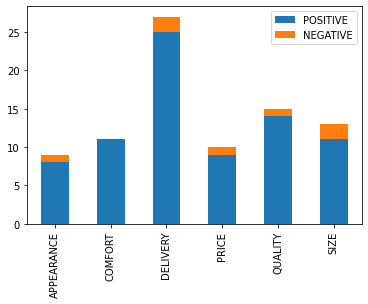

In [ ]:
base_product_sents_compile_RB = countSents(base_product_sents_RB)
displayStackedBar(base_product_sents_compile_RB)

          APPEARANCE  COMFORT  DELIVERY  PRICE  QUALITY  SIZE
POSITIVE          17       18        41     15       26    19
None             106      107        81    109       97    97
NEGATIVE           2        0         3      1        2     9


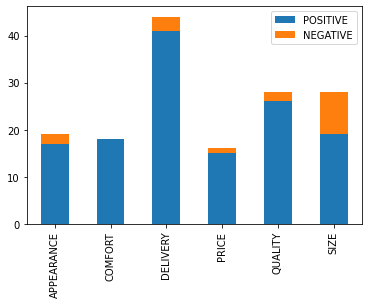

In [ ]:
competitors_sents_compile_RB = countSents(competitors_sents_RB)
displayStackedBar(competitors_sents_compile_RB)